# Evaluate overall classification thresholds

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_theme()

In [4]:
thresholds = np.arange(0.1,1.1,0.1)

In [5]:
metric = 'roc_auc'

In [6]:
def calculate_metrics(metric_name, labels, class_probabilities, thresholds):
    
    true_labels = list(labels)
    predicted_label_probabilities = list(class_probabilities)
    metrics = []
    
    for threshold in thresholds:
        
        predicted_labels = [1 if i >= threshold else 0 for i in predicted_label_probabilities]
        
        # accuracy
        if metric_name == 'accuracy':
            metric = round(accuracy_score(true_labels, predicted_labels), 2)
            metrics.append(metric)
            print(round(threshold, 1), metric)
        
        # f1
        if metric_name == 'f1':
            metric = round(f1_score(true_labels, predicted_labels), 2)
            metrics.append(metric)
            print(round(threshold, 1), metric)
        
        # precision
        if metric_name == 'precision':
            metric = round(precision_score(true_labels, predicted_labels), 2)
            metrics.append(metric)
            print(round(threshold, 1), metric)
        
        # recall
        if metric_name == 'recall':
            metric = round(recall_score(true_labels, predicted_labels), 2)
            metrics.append(metric)
            print(round(threshold, 1), metric)
        
        # roc_auc
        if metric_name == 'roc_auc':
            metric = round(roc_auc_score(true_labels, predicted_labels), 2)
            metrics.append(metric)
            print(round(threshold, 1), metric)
        
    return metrics

In [7]:
def plot_metrics(model_name, metric_name, metrics, thresholds, subset, number_of_observations):
    
    if metric_name == 'roc_auc':
        metric_name = metric_name.replace('_', ' ').upper()
    else:
        metric_name = metric_name.capitalize()
    
    plt.plot(thresholds, metrics, marker='o')
    plt.xticks(thresholds)
    plt.xlabel('Threshold')
    plt.ylim(0, 1)
    plt.yticks(thresholds)
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} at different classification thresholds for {model_name}\n{subset.capitalize()} set size: {number_of_observations}')
    plt.show()

## Evaluate random forest

Data used for training: KAZABengoCrop2020Random2000

Run this [script](https://github.com/alexvmt/farm_plot_detection/blob/main/earth_engine_scripts/random_forest_kaza_bengo_crop_2020_openmapflow.js) in Google Earth Engine to export the desired class probablities. Then, download them from Google Drive and copy them to the correct directory.

In [8]:
directory = '../processed_data/classification_threshold_evaluation/random_forest'

### Load validation set labels and predicted validation set class probabilities

In [9]:
file = 'predicted_class_probabilities_val.csv'
path = os.path.join(directory, file)
predicted_class_probabilities_val = pd.read_csv(path)
print(predicted_class_probabilities_val.shape)
predicted_class_probabilities_val.head()

(378, 9)


,system:index,B2,B3,B4,B8,NDVI,classification,crop,.geo
0,00000000000000000000_0,0.118800,0.169240,0.234440,0.352960,0.201446,0.865704,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000000013_0,0.048940,0.068200,0.069740,0.206440,0.494545,0.198393,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000000016_0,0.084131,0.109754,0.106369,0.276585,0.515181,0.611581,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000000017_0,0.042025,0.060925,0.051700,0.237825,0.642965,0.045210,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000000024_0,0.038875,0.056613,0.043650,0.212688,0.659931,0.049084,0,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [10]:
predicted_class_probabilities_val['crop'].value_counts()

1    205
0    173
Name: crop, dtype: int64

### Calculate test set accuracy at different thresholds

In [11]:
accuracies_rf = calculate_metrics(metric, predicted_class_probabilities_val['crop'], predicted_class_probabilities_val['classification'], thresholds)

0.1 0.57
0.2 0.67
0.3 0.73
0.4 0.75
0.5 0.76
0.6 0.75
0.7 0.68
0.8 0.62
0.9 0.57
1.0 0.5


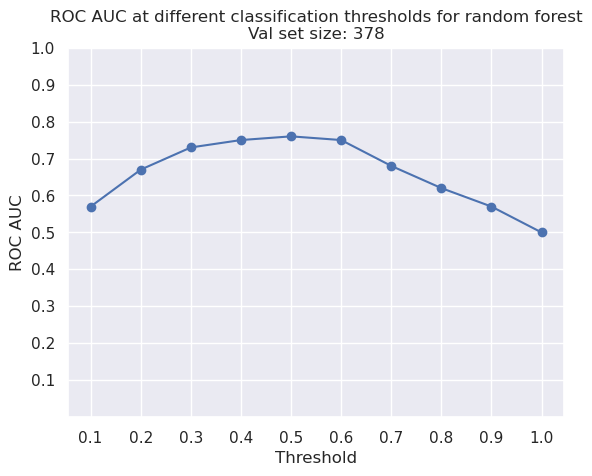

In [12]:
plot_metrics('random forest', metric, accuracies_rf, thresholds, 'val', predicted_class_probabilities_val.shape[0])

### Load test set labels and predicted test set class probabilities

In [13]:
file = 'predicted_class_probabilities_test.csv'
path = os.path.join(directory, file)
predicted_class_probabilities_test = pd.read_csv(path)
print(predicted_class_probabilities_test.shape)
predicted_class_probabilities_test.head()

(428, 9)


,system:index,B2,B3,B4,B8,NDVI,classification,crop,.geo
0,00000000000000000004_0,0.024233,0.037700,0.033133,0.174767,0.681182,0.164649,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000000005_0,0.037214,0.057114,0.048871,0.216029,0.634218,0.216665,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000000015_0,0.057267,0.077600,0.079167,0.249200,0.517727,0.153445,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,0000000000000000001a_0,0.039997,0.060628,0.067481,0.227687,0.543460,0.261508,0,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000000025_0,0.036117,0.053967,0.059367,0.230917,0.590844,0.158440,0,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [14]:
predicted_class_probabilities_test['crop'].value_counts()

0    220
1    208
Name: crop, dtype: int64

### Calculate test set accuracy at different thresholds

In [15]:
accuracies_rf = calculate_metrics(metric, predicted_class_probabilities_test['crop'], predicted_class_probabilities_test['classification'], thresholds)

0.1 0.59
0.2 0.65
0.3 0.7
0.4 0.73
0.5 0.75
0.6 0.74
0.7 0.7
0.8 0.65
0.9 0.58
1.0 0.5


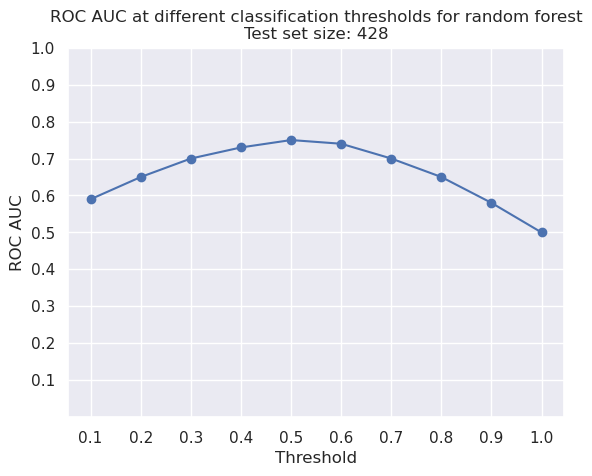

In [16]:
plot_metrics('random forest', metric, accuracies_rf, thresholds, 'test', predicted_class_probabilities_test.shape[0])

## Evaluate OpenMapFlow model

Data used for training: GeowikiLandcover2017 and KAZABengoCrop2020Random2000

Get the validation and test set labels and predicted validation and test set class probablities from this [notebook](https://github.com/alexvmt/farm_plot_detection/blob/main/create_maps_for_small_regions.ipynb) through modifying `evaluate.py`.

Add the following code:

```
# export test set with predicted class probabilities
test_df['predicted_class_probability'] = y_score
test_df.to_csv('test_df.csv', index=False)
```

Download the csv file and copy it to the right directory to be loaded in the present notebook.

Change "testing" to "validation" in line 45 to repeat the process for the validation set.

In [17]:
directory = '../processed_data/classification_threshold_evaluation/openmapflow'

### Load test set labels and predicted class probabilities

In [18]:
file = 'val_df.csv'
path = os.path.join(directory, file)
val_df = pd.read_csv(path)
print(val_df.shape)
val_df.head()

(378, 19)


,lon,lat,start_date,end_date,source,class_probability,num_labelers,subset,analysis_duration,email,country,dataset,eo_data,eo_lon,eo_lat,eo_file,eo_status,crop,predicted_class_probability
0,26.273130,-18.677686,2020-01-01,2021-12-31,NaN,0,NaN,validation,NaN,NaN,KAZA Bengo,NaN,"[[-11.581751300741079, -18.474331940837484, 14...",26.273162,-18.677726,min_lat=-18.6784_min_lon=26.2724_max_lat=-18.6...,eo_data_complete,0.0,0.591271
1,24.682517,-17.741584,2020-01-01,2021-12-31,NaN,1,NaN,validation,NaN,NaN,KAZA Bengo,NaN,"[[-12.337564239699724, -18.583445196882803, 11...",24.682515,-17.741592,min_lat=-17.7423_min_lon=24.6818_max_lat=-17.7...,eo_data_complete,1.0,0.907108
2,25.949454,-18.116932,2020-01-01,2021-12-31,NaN,1,NaN,validation,NaN,NaN,KAZA Bengo,NaN,"[[-11.053719851296748, -17.505641691734816, 12...",25.949499,-18.116908,min_lat=-18.1177_min_lon=25.9487_max_lat=-18.1...,eo_data_complete,1.0,0.589035
3,26.278830,-18.626814,2020-01-01,2021-12-31,NaN,0,NaN,validation,NaN,NaN,KAZA Bengo,NaN,"[[-12.373071007612186, -18.217272689920446, 12...",26.278821,-18.626792,min_lat=-18.6275_min_lon=26.2781_max_lat=-18.6...,eo_data_complete,0.0,0.124235
4,25.286036,-15.444899,2020-01-01,2021-12-31,NaN,0,NaN,validation,NaN,NaN,KAZA Bengo,NaN,"[[-14.718798302707608, -19.456042719069494, 10...",25.286003,-15.444869,min_lat=-15.4456_min_lon=25.2853_max_lat=-15.4...,eo_data_complete,0.0,0.293120


### Calculate test set accuracy at different thresholds

In [19]:
accuracies_omf = calculate_metrics(metric, val_df['crop'], val_df['predicted_class_probability'], thresholds)

0.1 0.57
0.2 0.64
0.3 0.71
0.4 0.74
0.5 0.75
0.6 0.7
0.7 0.68
0.8 0.62
0.9 0.54
1.0 0.5


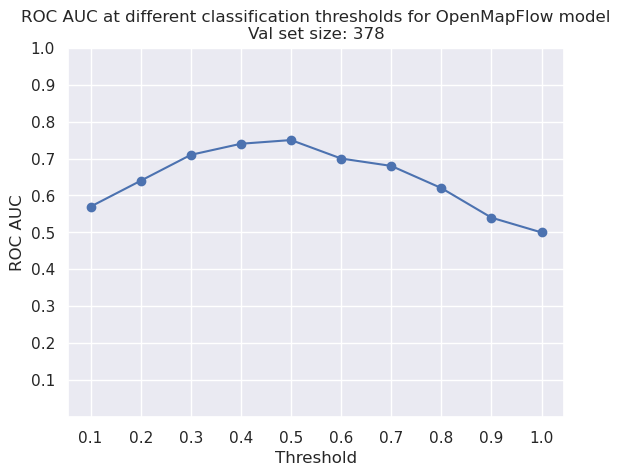

In [20]:
plot_metrics('OpenMapFlow model', metric, accuracies_omf, thresholds, 'val', val_df.shape[0])

### Load test set labels and predicted class probabilities

In [21]:
file = 'test_df.csv'
path = os.path.join(directory, file)
test_df = pd.read_csv(path)
print(test_df.shape)
test_df.head()

(428, 19)


,lon,lat,start_date,end_date,source,class_probability,num_labelers,subset,analysis_duration,email,country,dataset,eo_data,eo_lon,eo_lat,eo_file,eo_status,crop,predicted_class_probability
0,25.052454,-15.191106,2020-01-01,2021-12-31,NaN,0,NaN,testing,NaN,NaN,KAZA Bengo,NaN,"[[-9.628158501370667, -16.808534814558556, 759...",25.052441,-15.191095,min_lat=-15.1918_min_lon=25.0517_max_lat=-15.1...,eo_data_complete,0.0,0.060221
1,27.358089,-17.878459,2020-01-01,2021-12-31,NaN,0,NaN,testing,NaN,NaN,KAZA Bengo,NaN,"[[-5.700228016629306, -11.529822327190395, 815...",27.358057,-17.878495,min_lat=-17.8792_min_lon=27.3573_max_lat=-17.8...,eo_data_complete,0.0,0.064586
2,26.726072,-18.395221,2020-01-01,2021-12-31,NaN,1,NaN,testing,NaN,NaN,KAZA Bengo,NaN,"[[-12.505697956148616, -17.39743511607329, 122...",26.726092,-18.395206,min_lat=-18.3959_min_lon=26.7253_max_lat=-18.3...,eo_data_complete,1.0,0.640205
3,27.332060,-17.750969,2020-01-01,2021-12-31,NaN,1,NaN,testing,NaN,NaN,KAZA Bengo,NaN,"[[-10.132055032238343, -17.744865253011067, 12...",27.332096,-17.750935,min_lat=-17.7517_min_lon=27.3313_max_lat=-17.7...,eo_data_complete,1.0,0.497576
4,24.223431,-17.507113,2020-01-01,2021-12-31,NaN,1,NaN,testing,NaN,NaN,KAZA Bengo,NaN,"[[-12.94214040633846, -20.61706520608989, 1517...",24.223476,-17.507132,min_lat=-17.5078_min_lon=24.2227_max_lat=-17.5...,eo_data_complete,1.0,0.941447


### Calculate test set accuracy at different thresholds

In [22]:
accuracies_omf = calculate_metrics(metric, test_df['crop'], test_df['predicted_class_probability'], thresholds)

0.1 0.59
0.2 0.69
0.3 0.75
0.4 0.78
0.5 0.75
0.6 0.74
0.7 0.69
0.8 0.63
0.9 0.56
1.0 0.5


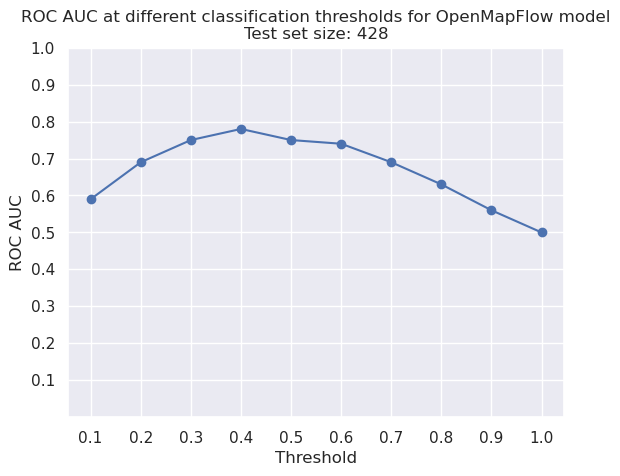

In [23]:
plot_metrics('OpenMapFlow model', metric, accuracies_omf, thresholds, 'test', test_df.shape[0])